<a href="https://colab.research.google.com/github/kaholict/Karpov-Course/blob/main/K_C_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# test_df = pd.DataFrame(data={'client_id': [NaN, 3998, NaN, NaN, 5736], 'sex': [NaN, 1, NaN, NaN, 0], 'wealth': [NaN, 'high', NaN, NaN, 'high'], 'age': [58, 55, 46, 23, 44]})
# # test_df

In [ ]:
# df_shape = f'df has {test_df.shape[0]} rows and {test_df.shape[1]} columns'
# df_shape

In [ ]:
# na_number = test_df.isna().sum()
# na_number

In [ ]:
# df_types = test_df.dtypes
# df_types

In [ ]:
# test_df.astype({'age': 'int'})
# df_types = test_df.dtypes
# df_types

In [ ]:
# test_df.drop(['sex', 'age'], axis=1, inplace=True)
# test_df

Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!  
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;.  
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime().  
Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [ ]:
taxi = pd.read_csv('/content/taxi_peru.csv', sep=';',  parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi.start_type.unique()

array(['asap', 'reserved', 'delayed'], dtype=object)

In [ ]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [ ]:
taxi.shape

(23091, 19)

In [ ]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [ ]:
taxi.query("start_type == 'reserved' and wait_time > 0") \
.groupby('driver_id', as_index=False) \
.agg({'wait_time': 'count'}) \
.sort_values(by='wait_time', ascending=False)

,driver_id,wait_time
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз: 406921adcca37705ef527b4246c0cfea

Подумайте, что может влиять на число опозданий из прошлого задания

In [ ]:
late_taxi = taxi.query('start_type == "reserved" and wait_time > 0')
late_taxi = late_taxi.drop(['journey_id', 'user_id'], axis=1)
late_taxi.head()

,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
11,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,7.0
51,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,reserved,2010-10-12 19:45:00,"-12,11184692","-77,03222656",2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,iPhone,NaN,5.0,11.0
67,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
83,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-16 22:30:00,"-12,10181985","-76,97150599",2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,Android,0.0,4.0,3.0
157,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,reserved,2010-03-27 23:30:00,"-12,0966369","-77,0295319",2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,web,NaN,5.0,1.0


⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [ ]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.day_name()
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


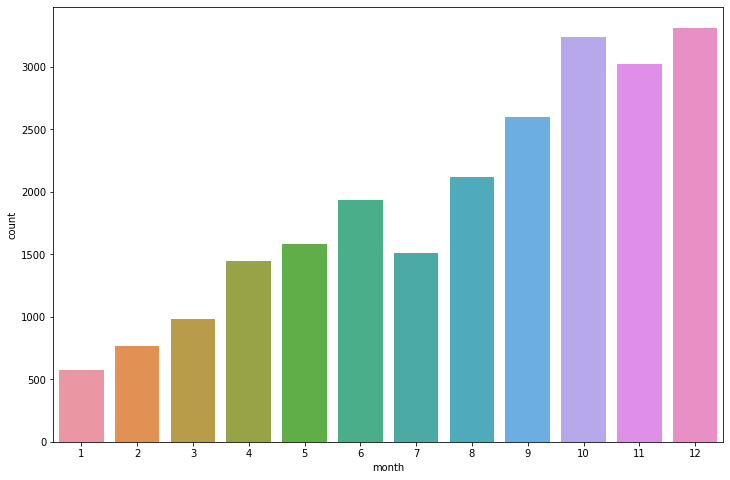

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(taxi.month)

In [ ]:
import itertools
month_count = taxi.month.value_counts().sort_index().to_dict()
summer_count = dict(list(month_count.items())[5:8])
max(summer_count, key=summer_count.get)

8

**Наибольшее количество заказов было сделано в 8 месяце.**

⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


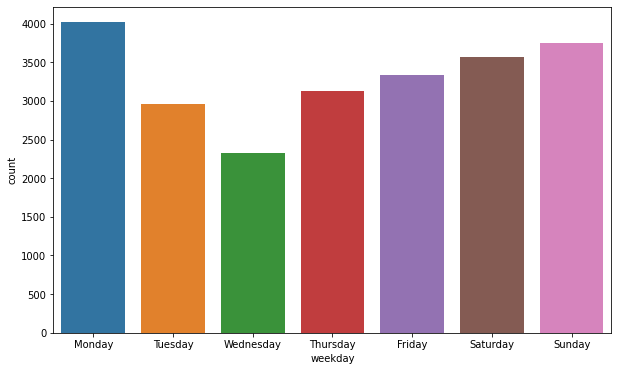

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(taxi.weekday, order=["Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"])

In [ ]:
taxi.weekday.value_counts().idxmin()

2

Наименьшее количество заказов приходится на среду

⭐️Задание со звёздочкой!⭐️  
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:  
DAU (daily active users) – число уникальных пользователей за день  
WAU (weekly active users) – число уникальных пользователей за неделю  
MAU (monthly active users) – число уникальных пользователей за месяц  
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.   
Могут пригодиться:  
groupby – группировка  
nunique – число уникальных значений  
plot.line – линейная диаграмма

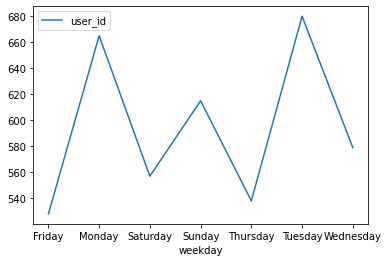

In [ ]:
dau = taxi.groupby('weekday').agg({'user_id': pd.Series.nunique})
dau.plot.line()